In [1]:
# script for kotte model identifiability without noise in input experimental data
import numpy as np
from generate_expdata import generate_expdata
from simulate_data import arrange_experimental_data
from kotte_model import flux_ident_2_data_combination
from kotte_model import flux_ident_3_data_combination
from process_ident_data import process_info_sample
from plot_ident_results import data_utility_plot
from plot_ident_results import parameter_identifibaility_plot
from plot_ident_results import parameter_experiment_info_plot

# generate noisy experimental data for testing identifiability
y0 = np.array([5, 1, 1])
# default parameter values
cvode_options = ('Newton', 'Adams', 1e-10, 1e-10, 200)
ode_parameter_values = np.array([.1, .1, 4e6, .1, .3, 1.1, .45, 2, .25, .2, 1, 1, 1, .1])

# get experimental system steady state data without noise
exp_xss, exp_fss, exp_ssid, perturbation_details = \
    generate_expdata(y0, cvode_options, ode_parameter_values, noise=0)

# arrange experimental data to form multiple data sets
exp_flux_index = np.array([0, 3, 2, 4])

Could not find GLIMDA
Final Run Statistics: --- 

 Number of steps                                 : 463
 Number of function evaluations                  : 578
 Number of Jacobian evaluations                  : 8
 Number of function eval. due to Jacobian eval.  : 24
 Number of error test failures                   : 23
 Number of nonlinear iterations                  : 574
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : Adams
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 12
 Tolerances (absolute)    : 1e-10
 Tolerances (relative)    : 1e-10

Simulation interval    : 0.0 - 200.0 seconds.
Elapsed simulation time: 0.0295970876415 seconds.
Perturbation 1

Final Run Statistics: --- 

 Number of steps                                 : 5
 Number of function evaluations                  : 9
 Number of Jacobian evaluations                  : 1
 Number of functi

Final Run Statistics: --- 

 Number of steps                                 : 294
 Number of function evaluations                  : 374
 Number of Jacobian evaluations                  : 5
 Number of function eval. due to Jacobian eval.  : 15
 Number of error test failures                   : 15
 Number of nonlinear iterations                  : 370
 Number of nonlinear convergence failures        : 0

Solver options:

 Solver                   : CVode
 Linear multistep method  : Adams
 Nonlinear solver         : Newton
 Linear solver type       : DENSE
 Maximal order            : 12
 Tolerances (absolute)    : 1e-10
 Tolerances (relative)    : 1e-10

Simulation interval    : 0.0 - 200.0 seconds.
Elapsed simulation time: 0.0219633647834 seconds.
Perturbation 14

Final Run Statistics: --- 

 Number of steps                                 : 271
 Number of function evaluations                  : 356
 Number of Jacobian evaluations                  : 5
 Number of function eval. due to J

In [2]:
# get combination of 2 experiments and perform identifiability on all fluxes that require 2 data sets
print('Practical Identifiability Analysis of fluxes with 2 parameters \n')
choose_2 = range(0, 306) # choose numbr of experimental datasets to use of analysis
# get combinations of experimental datasets
experimental_datasets_2_expts = \
    arrange_experimental_data(exp_xss, exp_fss, perturbation_details, 2, exp_flux_index, choose_2)
ident_details_2 = flux_ident_2_data_combination(experimental_datasets_2_expts, choose=choose_2, flux_ids=[1, 2])
print('Identifiability analysis for fluxes with 2 parameters complete.\n')
# data processing
experiment_type_indices = [[0], [1, 2], [3, 4, 5, 6, 7], [8, 9, 10, 11, 12], [13, 14, 15, 16, 17]]
data_list_2, max_parameter_2, experiment_info_2, \
combined_data_list_2, combined_max_parameter_2, \
combined_experiment_info_2 = process_info_sample(ident_details_2,
                                                 experimental_datasets_2_expts,
                                                 experiment_type_indices,
                                                 perturbation_details, combine_fluxes=1)

Practical Identifiability Analysis of fluxes with 2 parameters 

Identifiability for Dataset 1 of 306: Original ID: 0

Identifiability for Dataset 2 of 306: Original ID: 1

Identifiability for Dataset 3 of 306: Original ID: 2

Identifiability for Dataset 4 of 306: Original ID: 3

Identifiability for Dataset 5 of 306: Original ID: 4

Identifiability for Dataset 6 of 306: Original ID: 5

Identifiability for Dataset 7 of 306: Original ID: 6

Identifiability for Dataset 8 of 306: Original ID: 7

Identifiability for Dataset 9 of 306: Original ID: 8

Identifiability for Dataset 10 of 306: Original ID: 9

Identifiability for Dataset 11 of 306: Original ID: 10

Identifiability for Dataset 12 of 306: Original ID: 11

Identifiability for Dataset 13 of 306: Original ID: 12

Identifiability for Dataset 14 of 306: Original ID: 13

Identifiability for Dataset 15 of 306: Original ID: 14

Identifiability for Dataset 16 of 306: Original ID: 15

Identifiability for Dataset 17 of 306: Original ID: 16

Id

Frequency for type 2 of 5: 8 of 58 data combinations
Frequency for type 3 of 5: 10 of 58 data combinations
Frequency for type 4 of 5: 8 of 58 data combinations
Experiment type frequencies in position 2 of 2:
Frequency for type 0 of 5: 2 of 58 data combinations
Frequency for type 1 of 5: 30 of 58 data combinations
Frequency for type 2 of 5: 8 of 58 data combinations
Frequency for type 3 of 5: 10 of 58 data combinations
Frequency for type 4 of 5: 8 of 58 data combinations
Experiment type analysis for parameter 2 complete 

Experiment types for parameter 3 of 6
Experiment type frequencies in position 1 of 2:
Frequency for type 0 of 5: 2 of 66 data combinations
Frequency for type 1 of 5: 34 of 66 data combinations
Frequency for type 2 of 5: 10 of 66 data combinations
Frequency for type 3 of 5: 10 of 66 data combinations
Frequency for type 4 of 5: 10 of 66 data combinations
Experiment type frequencies in position 2 of 2:
Frequency for type 0 of 5: 2 of 66 data combinations
Frequency for typ

kotte_model.py:97: RuntimeWarning: invalid value encountered in double_scalars
  k1cat_enzyme_value = k1cat_enzyme_numerator_value/k1cat_enzyme_denominator_value
kotte_model.py:100: RuntimeWarning: invalid value encountered in double_scalars
  k1ac_enzyme_value = k1ac_enzyme_numerator_value/k1ac_enzyme_denominator_value
identifiability_analysis.py:29: RuntimeWarning: invalid value encountered in sign
  signed_ident_values = np.sign(ident_values)


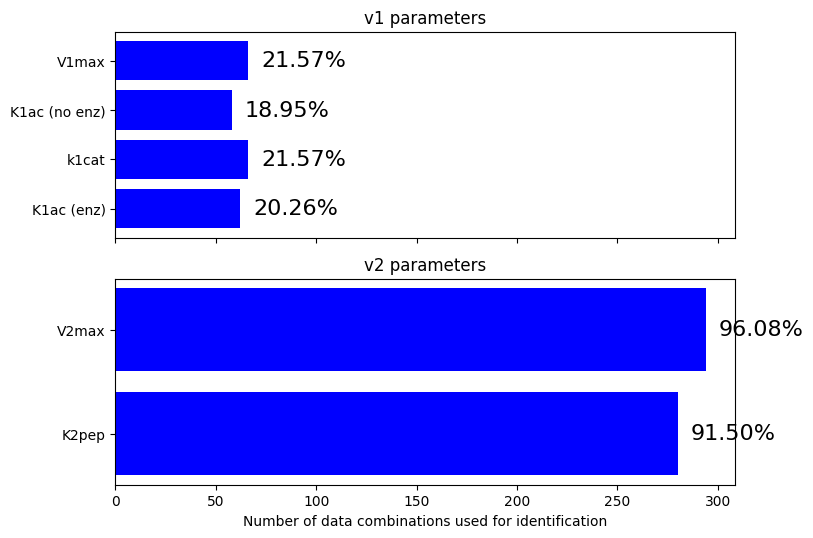

In [3]:
# plot parameter identifibaility for all fluxes using 2 data combinations
parameter_identifibaility_plot(max_parameter_2)

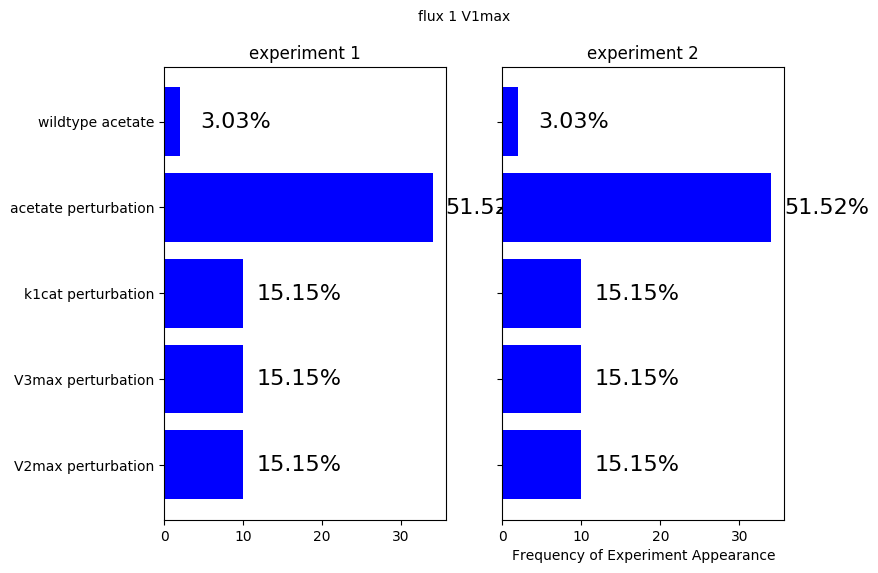

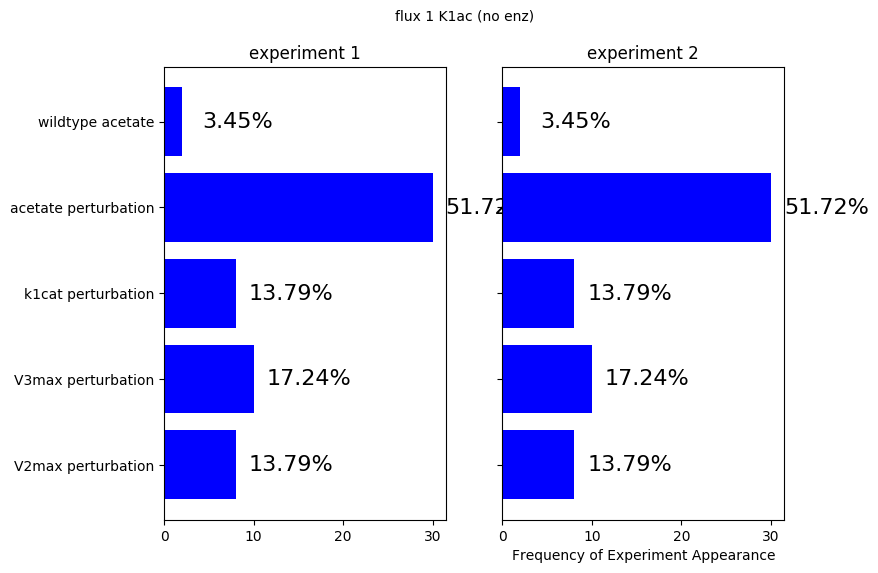

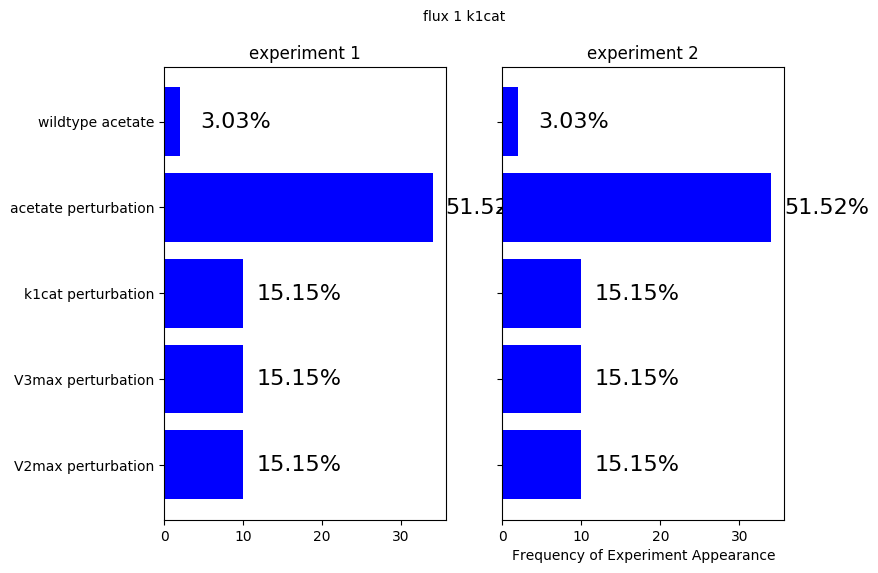

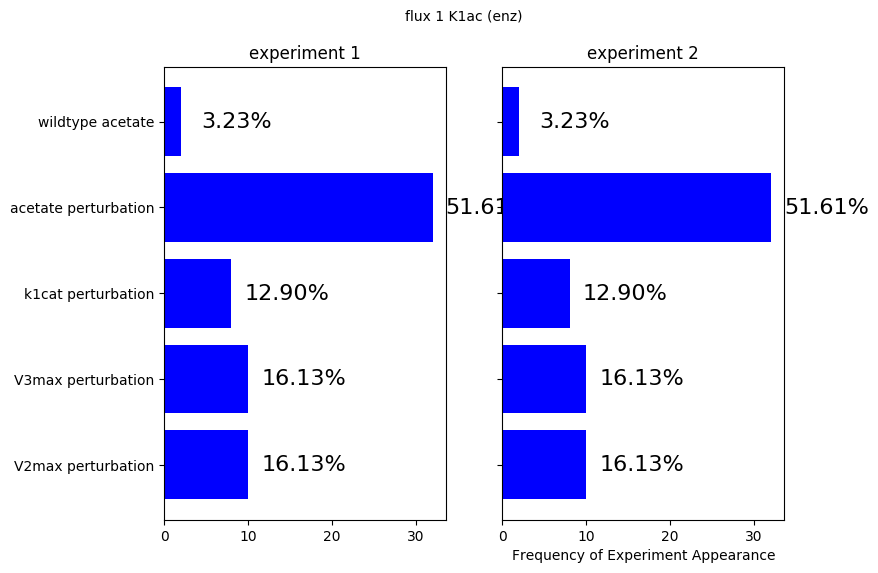

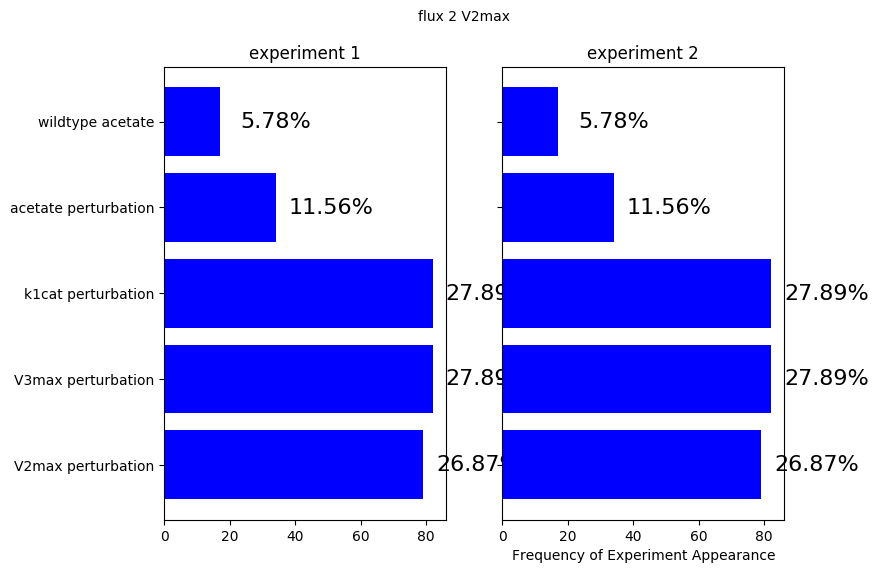

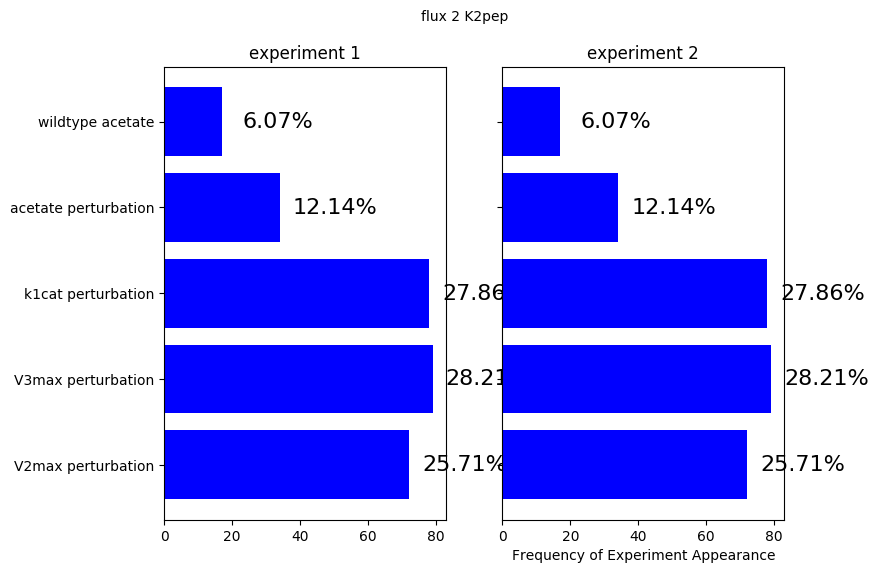

In [4]:
# plot experiment type in each position based on all parameter
# identifiable data combinations for each parameter
parameter_experiment_info_plot(experiment_info_2)

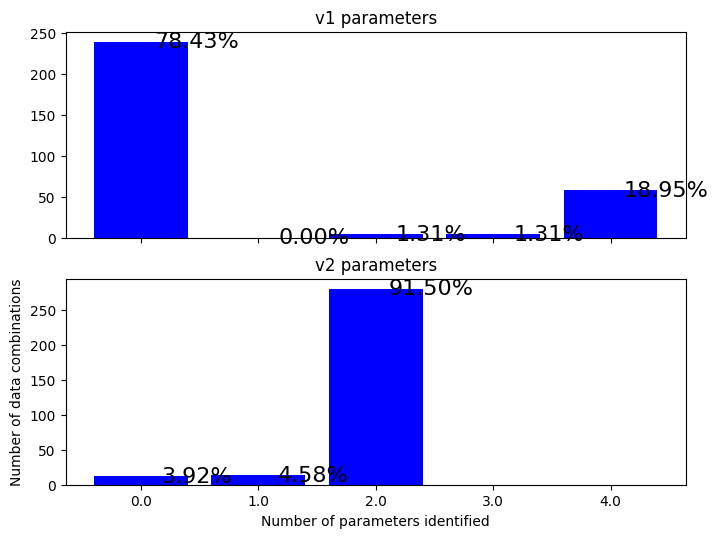

In [5]:
# plot utility of data sets (number of data sets identifying n, n-1, n-2, ...., 1, 0 parameters
data_utility_plot(data_list_2)

In [6]:
# get combination of 3 experiments and perform identifiability on all fluxes that require 3 data sets
print('Practical Identifiability Analysis of fluxes with 3 parameters \n')
choose_3 = range(0, 4896) # choose numbr of experimental datasets to use of analysis
# get combinations of experimental datasets
experimental_datasets_3_expts = \
    arrange_experimental_data(exp_xss, exp_fss, perturbation_details, 3, exp_flux_index, choose=choose_3)
ident_details_3 = flux_ident_3_data_combination(experimental_datasets_3_expts, choose=choose_3, flux_ids=[3])
print('Identifiability analysis for fluxes with 2 parameters complete.\n')
# data processing
data_list_3, max_parameter_3, experiment_info_3 = process_info_sample(ident_details_3,
                                                                      experimental_datasets_3_expts,
                                                                      experiment_type_indices,
                                                                      perturbation_details)

Practical Identifiability Analysis of fluxes with 3 parameters 

Identifiability for Dataset 1 of 4896: Original ID: 0

Identifiability for Dataset 2 of 4896: Original ID: 1

Identifiability for Dataset 3 of 4896: Original ID: 2

Identifiability for Dataset 4 of 4896: Original ID: 3

Identifiability for Dataset 5 of 4896: Original ID: 4

Identifiability for Dataset 6 of 4896: Original ID: 5

Identifiability for Dataset 7 of 4896: Original ID: 6

Identifiability for Dataset 8 of 4896: Original ID: 7

Identifiability for Dataset 9 of 4896: Original ID: 8

Identifiability for Dataset 10 of 4896: Original ID: 9

Identifiability for Dataset 11 of 4896: Original ID: 10

Identifiability for Dataset 12 of 4896: Original ID: 11

Identifiability for Dataset 13 of 4896: Original ID: 12

Identifiability for Dataset 14 of 4896: Original ID: 13

Identifiability for Dataset 15 of 4896: Original ID: 14

Identifiability for Dataset 16 of 4896: Original ID: 15

Identifiability for Dataset 17 of 4896: Or

kotte_model.py:203: RuntimeWarning: invalid value encountered in sqrt
  v31*v33*x12*x22*x23 + v31*v32*x13*x22*x23)) + \
kotte_model.py:210: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(sqrt_v3max_nr_1)))/\
kotte_model.py:273: RuntimeWarning: invalid value encountered in sqrt
  v31*v33*x12*x22*x23 + v31*v32*x13*x22*x23)) + \
kotte_model.py:280: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(sqrt_v3max_nr_2)))/\
kotte_model.py:343: RuntimeWarning: invalid value encountered in sqrt
  v31*v32*x13*x21*x23 - v31*v33*x12*x22*x23 + v31*v32*x13*x22*x23)) - \
kotte_model.py:350: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(sq_nr_1_k3fdp)))/ \
kotte_model.py:413: RuntimeWarning: invalid value encountered in sqrt
  v31*v33*x12*x22*x23 + v31*v32*x13*x22*x23)) - \
kotte_model.py:420: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(sq_k3fdp_nr_2)))/\
kotte_model.py:441: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(sq_k3pep_nr_1)
ko

Identifiability for Dataset 294 of 4896: Original ID: 293

Identifiability for Dataset 295 of 4896: Original ID: 294

Identifiability for Dataset 296 of 4896: Original ID: 295

Identifiability for Dataset 297 of 4896: Original ID: 296

Identifiability for Dataset 298 of 4896: Original ID: 297

Identifiability for Dataset 299 of 4896: Original ID: 298

Identifiability for Dataset 300 of 4896: Original ID: 299

Identifiability for Dataset 301 of 4896: Original ID: 300

Identifiability for Dataset 302 of 4896: Original ID: 301

Identifiability for Dataset 303 of 4896: Original ID: 302

Identifiability for Dataset 304 of 4896: Original ID: 303

Identifiability for Dataset 305 of 4896: Original ID: 304

Identifiability for Dataset 306 of 4896: Original ID: 305

Identifiability for Dataset 307 of 4896: Original ID: 306

Identifiability for Dataset 308 of 4896: Original ID: 307

Identifiability for Dataset 309 of 4896: Original ID: 308

Identifiability for Dataset 310 of 4896: Original ID: 30

Identifiability for Dataset 494 of 4896: Original ID: 493

Identifiability for Dataset 495 of 4896: Original ID: 494

Identifiability for Dataset 496 of 4896: Original ID: 495

Identifiability for Dataset 497 of 4896: Original ID: 496

Identifiability for Dataset 498 of 4896: Original ID: 497

Identifiability for Dataset 499 of 4896: Original ID: 498

Identifiability for Dataset 500 of 4896: Original ID: 499

Identifiability for Dataset 501 of 4896: Original ID: 500

Identifiability for Dataset 502 of 4896: Original ID: 501

Identifiability for Dataset 503 of 4896: Original ID: 502

Identifiability for Dataset 504 of 4896: Original ID: 503

Identifiability for Dataset 505 of 4896: Original ID: 504

Identifiability for Dataset 506 of 4896: Original ID: 505

Identifiability for Dataset 507 of 4896: Original ID: 506

Identifiability for Dataset 508 of 4896: Original ID: 507

Identifiability for Dataset 509 of 4896: Original ID: 508

Identifiability for Dataset 510 of 4896: Original ID: 50

Identifiability for Dataset 766 of 4896: Original ID: 765

Identifiability for Dataset 767 of 4896: Original ID: 766

Identifiability for Dataset 768 of 4896: Original ID: 767

Identifiability for Dataset 769 of 4896: Original ID: 768

Identifiability for Dataset 770 of 4896: Original ID: 769

Identifiability for Dataset 771 of 4896: Original ID: 770

Identifiability for Dataset 772 of 4896: Original ID: 771

Identifiability for Dataset 773 of 4896: Original ID: 772

Identifiability for Dataset 774 of 4896: Original ID: 773

Identifiability for Dataset 775 of 4896: Original ID: 774

Identifiability for Dataset 776 of 4896: Original ID: 775

Identifiability for Dataset 777 of 4896: Original ID: 776

Identifiability for Dataset 778 of 4896: Original ID: 777

Identifiability for Dataset 779 of 4896: Original ID: 778

Identifiability for Dataset 780 of 4896: Original ID: 779

Identifiability for Dataset 781 of 4896: Original ID: 780

Identifiability for Dataset 782 of 4896: Original ID: 78


Identifiability for Dataset 1053 of 4896: Original ID: 1052

Identifiability for Dataset 1054 of 4896: Original ID: 1053

Identifiability for Dataset 1055 of 4896: Original ID: 1054

Identifiability for Dataset 1056 of 4896: Original ID: 1055

Identifiability for Dataset 1057 of 4896: Original ID: 1056

Identifiability for Dataset 1058 of 4896: Original ID: 1057

Identifiability for Dataset 1059 of 4896: Original ID: 1058

Identifiability for Dataset 1060 of 4896: Original ID: 1059

Identifiability for Dataset 1061 of 4896: Original ID: 1060

Identifiability for Dataset 1062 of 4896: Original ID: 1061

Identifiability for Dataset 1063 of 4896: Original ID: 1062

Identifiability for Dataset 1064 of 4896: Original ID: 1063

Identifiability for Dataset 1065 of 4896: Original ID: 1064

Identifiability for Dataset 1066 of 4896: Original ID: 1065

Identifiability for Dataset 1067 of 4896: Original ID: 1066

Identifiability for Dataset 1068 of 4896: Original ID: 1067

Identifiability for Dat

Identifiability for Dataset 1337 of 4896: Original ID: 1336

Identifiability for Dataset 1338 of 4896: Original ID: 1337

Identifiability for Dataset 1339 of 4896: Original ID: 1338

Identifiability for Dataset 1340 of 4896: Original ID: 1339

Identifiability for Dataset 1341 of 4896: Original ID: 1340

Identifiability for Dataset 1342 of 4896: Original ID: 1341

Identifiability for Dataset 1343 of 4896: Original ID: 1342

Identifiability for Dataset 1344 of 4896: Original ID: 1343

Identifiability for Dataset 1345 of 4896: Original ID: 1344

Identifiability for Dataset 1346 of 4896: Original ID: 1345

Identifiability for Dataset 1347 of 4896: Original ID: 1346

Identifiability for Dataset 1348 of 4896: Original ID: 1347

Identifiability for Dataset 1349 of 4896: Original ID: 1348

Identifiability for Dataset 1350 of 4896: Original ID: 1349

Identifiability for Dataset 1351 of 4896: Original ID: 1350

Identifiability for Dataset 1352 of 4896: Original ID: 1351

Identifiability for Data

Identifiability for Dataset 1619 of 4896: Original ID: 1618

Identifiability for Dataset 1620 of 4896: Original ID: 1619

Identifiability for Dataset 1621 of 4896: Original ID: 1620

Identifiability for Dataset 1622 of 4896: Original ID: 1621

Identifiability for Dataset 1623 of 4896: Original ID: 1622

Identifiability for Dataset 1624 of 4896: Original ID: 1623

Identifiability for Dataset 1625 of 4896: Original ID: 1624

Identifiability for Dataset 1626 of 4896: Original ID: 1625

Identifiability for Dataset 1627 of 4896: Original ID: 1626

Identifiability for Dataset 1628 of 4896: Original ID: 1627

Identifiability for Dataset 1629 of 4896: Original ID: 1628

Identifiability for Dataset 1630 of 4896: Original ID: 1629

Identifiability for Dataset 1631 of 4896: Original ID: 1630

Identifiability for Dataset 1632 of 4896: Original ID: 1631

Identifiability for Dataset 1633 of 4896: Original ID: 1632

Identifiability for Dataset 1634 of 4896: Original ID: 1633

Identifiability for Data

Identifiability for Dataset 1907 of 4896: Original ID: 1906

Identifiability for Dataset 1908 of 4896: Original ID: 1907

Identifiability for Dataset 1909 of 4896: Original ID: 1908

Identifiability for Dataset 1910 of 4896: Original ID: 1909

Identifiability for Dataset 1911 of 4896: Original ID: 1910

Identifiability for Dataset 1912 of 4896: Original ID: 1911

Identifiability for Dataset 1913 of 4896: Original ID: 1912

Identifiability for Dataset 1914 of 4896: Original ID: 1913

Identifiability for Dataset 1915 of 4896: Original ID: 1914

Identifiability for Dataset 1916 of 4896: Original ID: 1915

Identifiability for Dataset 1917 of 4896: Original ID: 1916

Identifiability for Dataset 1918 of 4896: Original ID: 1917

Identifiability for Dataset 1919 of 4896: Original ID: 1918

Identifiability for Dataset 1920 of 4896: Original ID: 1919

Identifiability for Dataset 1921 of 4896: Original ID: 1920

Identifiability for Dataset 1922 of 4896: Original ID: 1921

Identifiability for Data


Identifiability for Dataset 2205 of 4896: Original ID: 2204

Identifiability for Dataset 2206 of 4896: Original ID: 2205

Identifiability for Dataset 2207 of 4896: Original ID: 2206

Identifiability for Dataset 2208 of 4896: Original ID: 2207

Identifiability for Dataset 2209 of 4896: Original ID: 2208

Identifiability for Dataset 2210 of 4896: Original ID: 2209

Identifiability for Dataset 2211 of 4896: Original ID: 2210

Identifiability for Dataset 2212 of 4896: Original ID: 2211

Identifiability for Dataset 2213 of 4896: Original ID: 2212

Identifiability for Dataset 2214 of 4896: Original ID: 2213

Identifiability for Dataset 2215 of 4896: Original ID: 2214

Identifiability for Dataset 2216 of 4896: Original ID: 2215

Identifiability for Dataset 2217 of 4896: Original ID: 2216

Identifiability for Dataset 2218 of 4896: Original ID: 2217

Identifiability for Dataset 2219 of 4896: Original ID: 2218

Identifiability for Dataset 2220 of 4896: Original ID: 2219

Identifiability for Dat

Identifiability for Dataset 2485 of 4896: Original ID: 2484

Identifiability for Dataset 2486 of 4896: Original ID: 2485

Identifiability for Dataset 2487 of 4896: Original ID: 2486

Identifiability for Dataset 2488 of 4896: Original ID: 2487

Identifiability for Dataset 2489 of 4896: Original ID: 2488

Identifiability for Dataset 2490 of 4896: Original ID: 2489

Identifiability for Dataset 2491 of 4896: Original ID: 2490

Identifiability for Dataset 2492 of 4896: Original ID: 2491

Identifiability for Dataset 2493 of 4896: Original ID: 2492

Identifiability for Dataset 2494 of 4896: Original ID: 2493

Identifiability for Dataset 2495 of 4896: Original ID: 2494

Identifiability for Dataset 2496 of 4896: Original ID: 2495

Identifiability for Dataset 2497 of 4896: Original ID: 2496

Identifiability for Dataset 2498 of 4896: Original ID: 2497

Identifiability for Dataset 2499 of 4896: Original ID: 2498

Identifiability for Dataset 2500 of 4896: Original ID: 2499

Identifiability for Data


Identifiability for Dataset 2770 of 4896: Original ID: 2769

Identifiability for Dataset 2771 of 4896: Original ID: 2770

Identifiability for Dataset 2772 of 4896: Original ID: 2771

Identifiability for Dataset 2773 of 4896: Original ID: 2772

Identifiability for Dataset 2774 of 4896: Original ID: 2773

Identifiability for Dataset 2775 of 4896: Original ID: 2774

Identifiability for Dataset 2776 of 4896: Original ID: 2775

Identifiability for Dataset 2777 of 4896: Original ID: 2776

Identifiability for Dataset 2778 of 4896: Original ID: 2777

Identifiability for Dataset 2779 of 4896: Original ID: 2778

Identifiability for Dataset 2780 of 4896: Original ID: 2779

Identifiability for Dataset 2781 of 4896: Original ID: 2780

Identifiability for Dataset 2782 of 4896: Original ID: 2781

Identifiability for Dataset 2783 of 4896: Original ID: 2782

Identifiability for Dataset 2784 of 4896: Original ID: 2783

Identifiability for Dataset 2785 of 4896: Original ID: 2784

Identifiability for Dat

Identifiability for Dataset 3048 of 4896: Original ID: 3047

Identifiability for Dataset 3049 of 4896: Original ID: 3048

Identifiability for Dataset 3050 of 4896: Original ID: 3049

Identifiability for Dataset 3051 of 4896: Original ID: 3050

Identifiability for Dataset 3052 of 4896: Original ID: 3051

Identifiability for Dataset 3053 of 4896: Original ID: 3052

Identifiability for Dataset 3054 of 4896: Original ID: 3053

Identifiability for Dataset 3055 of 4896: Original ID: 3054

Identifiability for Dataset 3056 of 4896: Original ID: 3055

Identifiability for Dataset 3057 of 4896: Original ID: 3056

Identifiability for Dataset 3058 of 4896: Original ID: 3057

Identifiability for Dataset 3059 of 4896: Original ID: 3058

Identifiability for Dataset 3060 of 4896: Original ID: 3059

Identifiability for Dataset 3061 of 4896: Original ID: 3060

Identifiability for Dataset 3062 of 4896: Original ID: 3061

Identifiability for Dataset 3063 of 4896: Original ID: 3062

Identifiability for Data

Identifiability for Dataset 3336 of 4896: Original ID: 3335

Identifiability for Dataset 3337 of 4896: Original ID: 3336

Identifiability for Dataset 3338 of 4896: Original ID: 3337

Identifiability for Dataset 3339 of 4896: Original ID: 3338

Identifiability for Dataset 3340 of 4896: Original ID: 3339

Identifiability for Dataset 3341 of 4896: Original ID: 3340

Identifiability for Dataset 3342 of 4896: Original ID: 3341

Identifiability for Dataset 3343 of 4896: Original ID: 3342

Identifiability for Dataset 3344 of 4896: Original ID: 3343

Identifiability for Dataset 3345 of 4896: Original ID: 3344

Identifiability for Dataset 3346 of 4896: Original ID: 3345

Identifiability for Dataset 3347 of 4896: Original ID: 3346

Identifiability for Dataset 3348 of 4896: Original ID: 3347

Identifiability for Dataset 3349 of 4896: Original ID: 3348

Identifiability for Dataset 3350 of 4896: Original ID: 3349

Identifiability for Dataset 3351 of 4896: Original ID: 3350

Identifiability for Data


Identifiability for Dataset 3622 of 4896: Original ID: 3621

Identifiability for Dataset 3623 of 4896: Original ID: 3622

Identifiability for Dataset 3624 of 4896: Original ID: 3623

Identifiability for Dataset 3625 of 4896: Original ID: 3624

Identifiability for Dataset 3626 of 4896: Original ID: 3625

Identifiability for Dataset 3627 of 4896: Original ID: 3626

Identifiability for Dataset 3628 of 4896: Original ID: 3627

Identifiability for Dataset 3629 of 4896: Original ID: 3628

Identifiability for Dataset 3630 of 4896: Original ID: 3629

Identifiability for Dataset 3631 of 4896: Original ID: 3630

Identifiability for Dataset 3632 of 4896: Original ID: 3631

Identifiability for Dataset 3633 of 4896: Original ID: 3632

Identifiability for Dataset 3634 of 4896: Original ID: 3633

Identifiability for Dataset 3635 of 4896: Original ID: 3634

Identifiability for Dataset 3636 of 4896: Original ID: 3635

Identifiability for Dataset 3637 of 4896: Original ID: 3636

Identifiability for Dat

Identifiability for Dataset 3907 of 4896: Original ID: 3906

Identifiability for Dataset 3908 of 4896: Original ID: 3907

Identifiability for Dataset 3909 of 4896: Original ID: 3908

Identifiability for Dataset 3910 of 4896: Original ID: 3909

Identifiability for Dataset 3911 of 4896: Original ID: 3910

Identifiability for Dataset 3912 of 4896: Original ID: 3911

Identifiability for Dataset 3913 of 4896: Original ID: 3912

Identifiability for Dataset 3914 of 4896: Original ID: 3913

Identifiability for Dataset 3915 of 4896: Original ID: 3914

Identifiability for Dataset 3916 of 4896: Original ID: 3915

Identifiability for Dataset 3917 of 4896: Original ID: 3916

Identifiability for Dataset 3918 of 4896: Original ID: 3917

Identifiability for Dataset 3919 of 4896: Original ID: 3918

Identifiability for Dataset 3920 of 4896: Original ID: 3919

Identifiability for Dataset 3921 of 4896: Original ID: 3920

Identifiability for Dataset 3922 of 4896: Original ID: 3921

Identifiability for Data

Identifiability for Dataset 4196 of 4896: Original ID: 4195

Identifiability for Dataset 4197 of 4896: Original ID: 4196

Identifiability for Dataset 4198 of 4896: Original ID: 4197

Identifiability for Dataset 4199 of 4896: Original ID: 4198

Identifiability for Dataset 4200 of 4896: Original ID: 4199

Identifiability for Dataset 4201 of 4896: Original ID: 4200

Identifiability for Dataset 4202 of 4896: Original ID: 4201

Identifiability for Dataset 4203 of 4896: Original ID: 4202

Identifiability for Dataset 4204 of 4896: Original ID: 4203

Identifiability for Dataset 4205 of 4896: Original ID: 4204

Identifiability for Dataset 4206 of 4896: Original ID: 4205

Identifiability for Dataset 4207 of 4896: Original ID: 4206

Identifiability for Dataset 4208 of 4896: Original ID: 4207

Identifiability for Dataset 4209 of 4896: Original ID: 4208

Identifiability for Dataset 4210 of 4896: Original ID: 4209

Identifiability for Dataset 4211 of 4896: Original ID: 4210

Identifiability for Data


Identifiability for Dataset 4478 of 4896: Original ID: 4477

Identifiability for Dataset 4479 of 4896: Original ID: 4478

Identifiability for Dataset 4480 of 4896: Original ID: 4479

Identifiability for Dataset 4481 of 4896: Original ID: 4480

Identifiability for Dataset 4482 of 4896: Original ID: 4481

Identifiability for Dataset 4483 of 4896: Original ID: 4482

Identifiability for Dataset 4484 of 4896: Original ID: 4483

Identifiability for Dataset 4485 of 4896: Original ID: 4484

Identifiability for Dataset 4486 of 4896: Original ID: 4485

Identifiability for Dataset 4487 of 4896: Original ID: 4486

Identifiability for Dataset 4488 of 4896: Original ID: 4487

Identifiability for Dataset 4489 of 4896: Original ID: 4488

Identifiability for Dataset 4490 of 4896: Original ID: 4489

Identifiability for Dataset 4491 of 4896: Original ID: 4490

Identifiability for Dataset 4492 of 4896: Original ID: 4491

Identifiability for Dataset 4493 of 4896: Original ID: 4492

Identifiability for Dat

Identifiability for Dataset 4767 of 4896: Original ID: 4766

Identifiability for Dataset 4768 of 4896: Original ID: 4767

Identifiability for Dataset 4769 of 4896: Original ID: 4768

Identifiability for Dataset 4770 of 4896: Original ID: 4769

Identifiability for Dataset 4771 of 4896: Original ID: 4770

Identifiability for Dataset 4772 of 4896: Original ID: 4771

Identifiability for Dataset 4773 of 4896: Original ID: 4772

Identifiability for Dataset 4774 of 4896: Original ID: 4773

Identifiability for Dataset 4775 of 4896: Original ID: 4774

Identifiability for Dataset 4776 of 4896: Original ID: 4775

Identifiability for Dataset 4777 of 4896: Original ID: 4776

Identifiability for Dataset 4778 of 4896: Original ID: 4777

Identifiability for Dataset 4779 of 4896: Original ID: 4778

Identifiability for Dataset 4780 of 4896: Original ID: 4779

Identifiability for Dataset 4781 of 4896: Original ID: 4780

Identifiability for Dataset 4782 of 4896: Original ID: 4781

Identifiability for Data

Frequency for type 0 of 5: 44 of 807 data combinations
Frequency for type 1 of 5: 107 of 807 data combinations
Frequency for type 2 of 5: 268 of 807 data combinations
Frequency for type 3 of 5: 256 of 807 data combinations
Frequency for type 4 of 5: 132 of 807 data combinations
Experiment type frequencies in position 2 of 3:
Frequency for type 0 of 5: 44 of 807 data combinations
Frequency for type 1 of 5: 107 of 807 data combinations
Frequency for type 2 of 5: 268 of 807 data combinations
Frequency for type 3 of 5: 256 of 807 data combinations
Frequency for type 4 of 5: 132 of 807 data combinations
Experiment type frequencies in position 3 of 3:
Frequency for type 0 of 5: 44 of 807 data combinations
Frequency for type 1 of 5: 107 of 807 data combinations
Frequency for type 2 of 5: 268 of 807 data combinations
Frequency for type 3 of 5: 256 of 807 data combinations
Frequency for type 4 of 5: 132 of 807 data combinations
Experiment type analysis for parameter 2 complete 

Experiment type

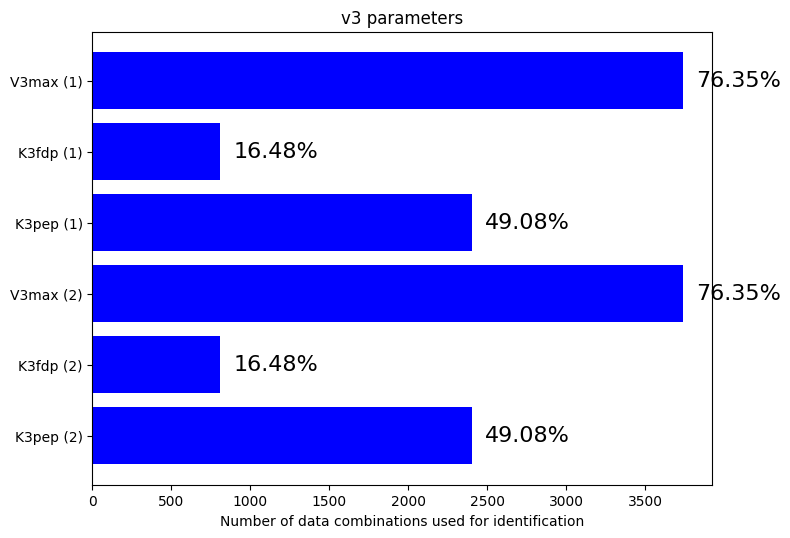

In [7]:
# plot parameter identifibaility for all fluxes using 3 data combinations
parameter_identifibaility_plot(max_parameter_3)

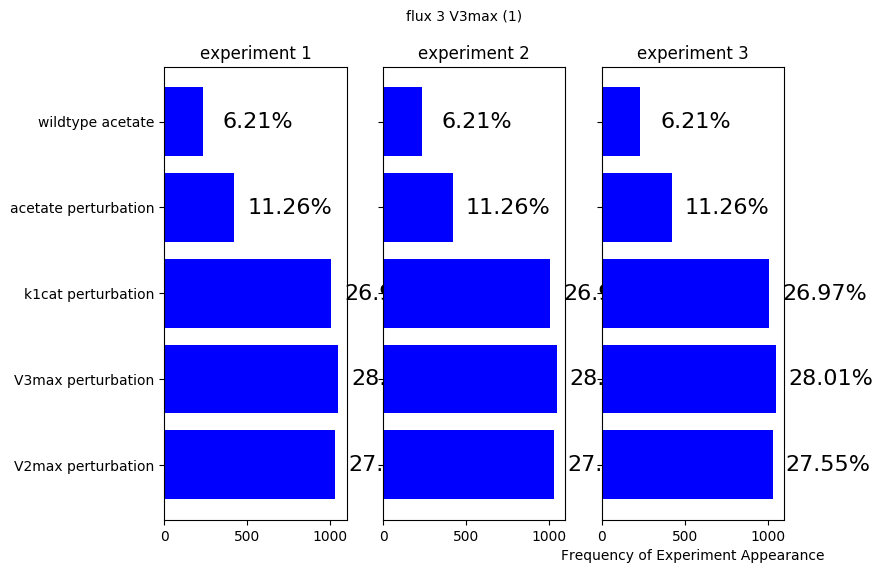

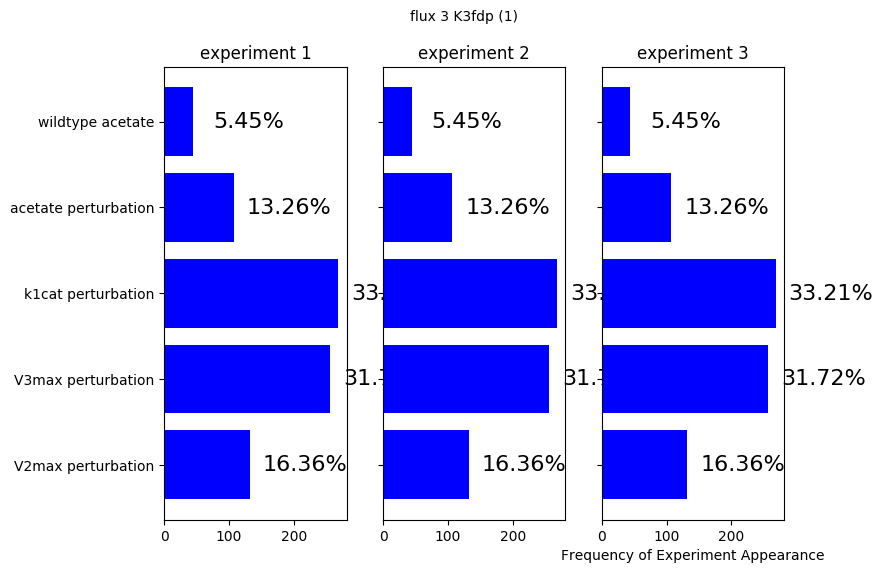

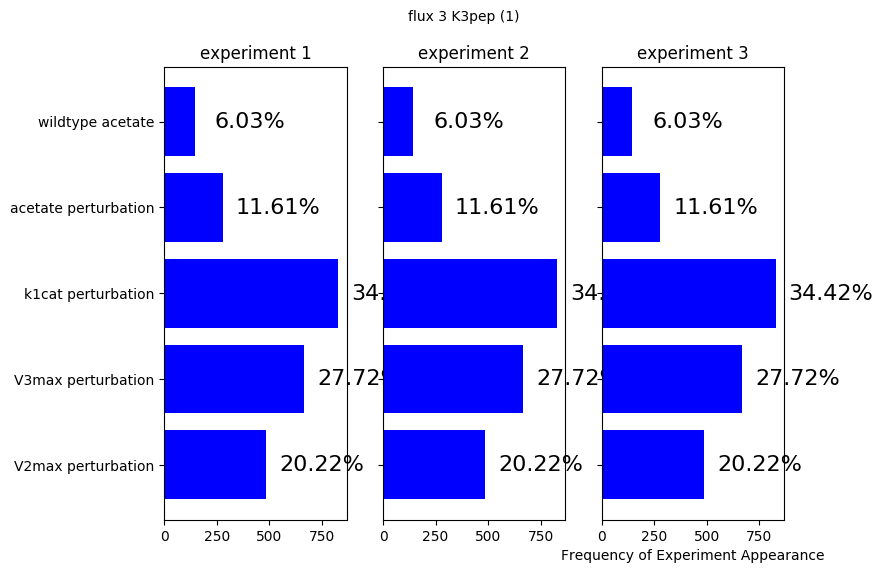

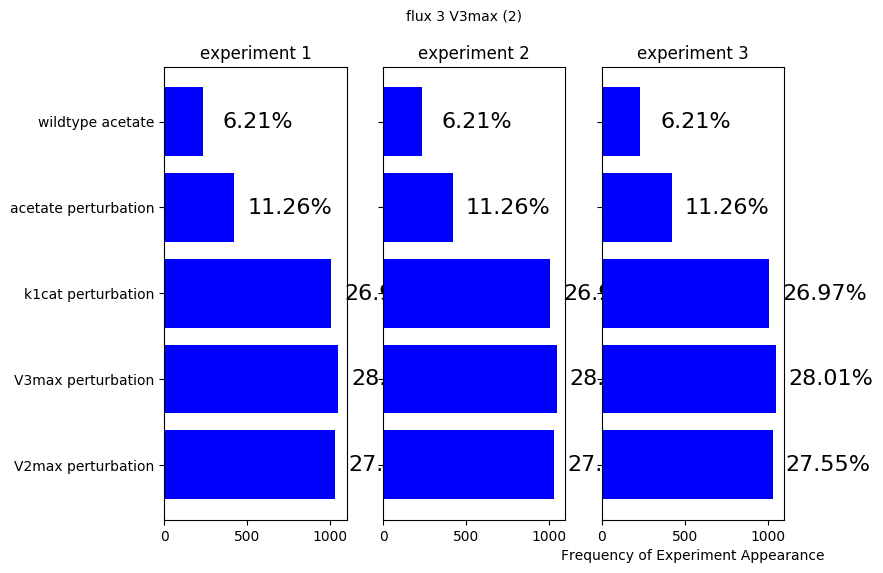

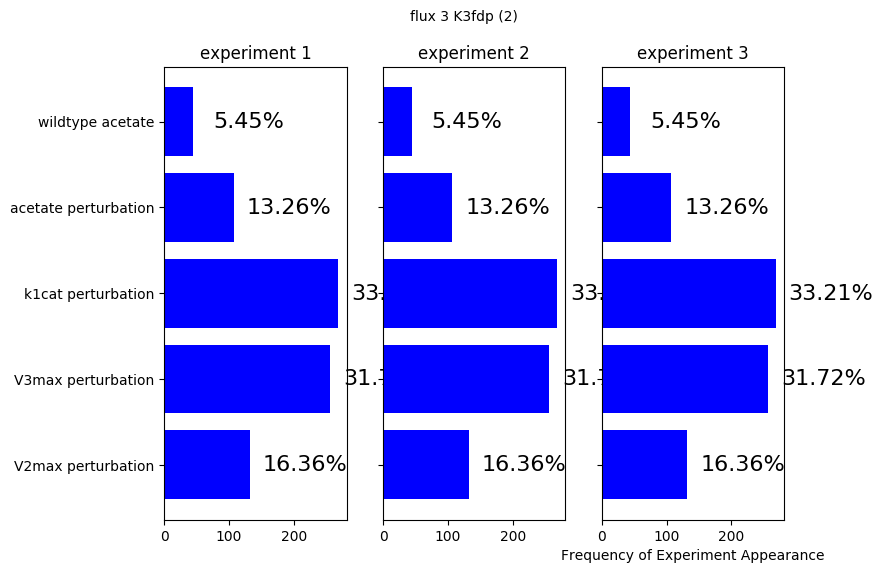

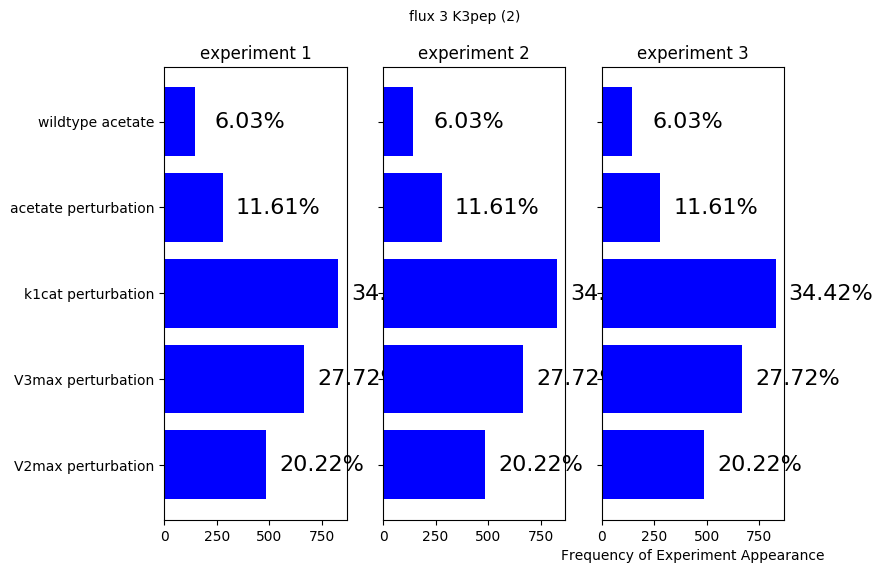

In [8]:
# plot experiment type in each position based on all parameter
# identifiable data combinations for each parameter
parameter_experiment_info_plot(experiment_info_3)

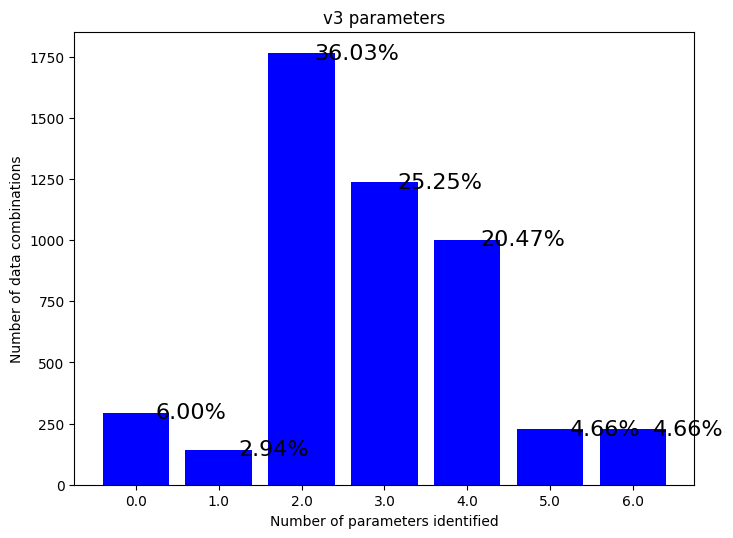

In [9]:
# plot utility of data sets (number of data sets identifying n, n-1, n-2, ...., 1, 0 parameters
data_utility_plot(data_list_3)